## Guided session 3
Supervised learning algorithms:
- Regression
- Classification 

#### Regression:  
- Determining the impact of response variables on the target variable. 
- Fitting a curve using training data to estimate target variable for unseen data

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Gaussian_kernel_regression.png" width="300" height="350" />
<p style="text-align: center;"> Regression curve </p> 

Let us see a demonstrative example of simple linear regression using the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) from the [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html). First we import python modules and the dataset:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn import datasets
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


The dataset has many features (or variables), but we will pick only the BMI so as to be able to plot and visualize the relationship between input and target variables.

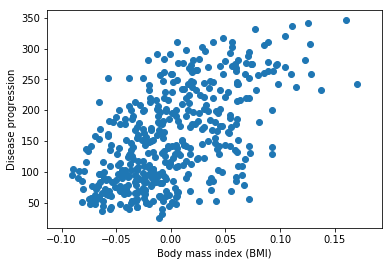

In [2]:
X = df['bmi'].values
Y = diabetes.target

plt.scatter(X, Y);
plt.xlabel('Body mass index (BMI)');
plt.ylabel('Disease progression');

Let us pick a few points from the dataset and try to fit a line.

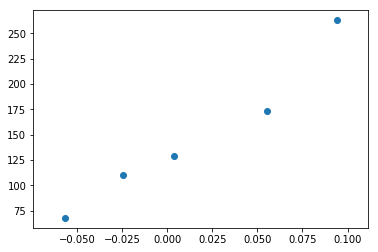

In [3]:
import random
random.seed(0)
idx = random.sample(range(len(df)), 5)
x1, y1 = X[idx], Y[idx]
plt.scatter(x1, y1);

In [4]:
def plot_line(w, b):
    x_values = np.linspace(X.min(), X.max(), 100)
    y_values = w*x_values + b
    plt.plot(x_values, y_values, 'r-')

We guess values for slope and intercept by trial-and-error:

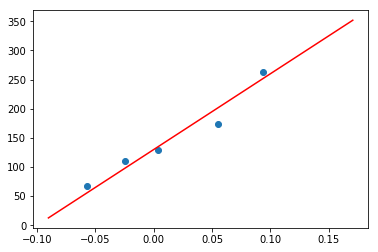

In [5]:
w = 1300
b = 130
plt.scatter(x1, y1);
plot_line(w, b);

As we add more points, the slop and intercept of the line needs to be adjusted accordingly.

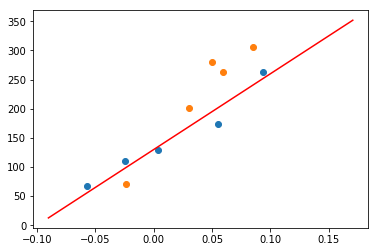

In [6]:
random.seed(12)
idx = random.sample(range(len(df)), 5)
x2, y2 = X[idx], Y[idx]
plt.scatter(x1, y1);
plt.scatter(x2, y2);
plot_line(w, b);

Try a few values of weights closer to the ones above and see which seems to fit best. 

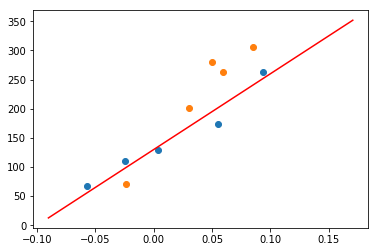

In [7]:
w =  
b = 
plt.scatter(x1, y1);
plt.scatter(x2, y2);
plot_line(w, b);

In a nutshell, we are trying to find the optimal value for the slope and intercept for the line and we are learning from the training examples. Our objective is to minimize the difference between the actual $y$ value and the value predicted using the line. 

In [8]:
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
y_pred = w*x + b
error = y - y_pred
pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred, 
              'error': error})

,x,y,y_pred,error
0,0.055229,173.0,201.798134,-28.798134
1,0.003494,129.0,134.542661,-5.542661
2,-0.024529,110.0,98.112613,11.887387
3,0.094031,263.0,252.239739,10.760261
4,-0.056863,68.0,56.077942,11.922058
5,-0.023451,71.0,99.513768,-28.513768
6,0.049840,280.0,194.792356,85.207644
7,0.085408,306.0,241.030494,64.969506
8,0.030440,202.0,169.571553,32.428447
9,0.059541,263.0,207.402757,55.597243


The simple linear regression (linear regression with one variable) is formulated as $ y_{pred} = w * x + b $.

To find the optimal values for $w$ and $b$, we need to quantify the cost function (also known as the error function or the loss function) that we can minimize. 

* How do we formulate it?
* Should we sum up the errors? If not, why?

The simple linear regression model uses the mean-squared error (MSE) as the cost function. We square the errors and then take their average.

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})^2 $$

The [gradient descent algorithm](https://machinelearningmastery.com/gradient-descent-for-machine-learning/) is used to update the weights iteratively in the direction of the steepest descent of the cost function. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate.

To derive the formula for updating weights, we first substitute $ y_{pred}^{(i)} = w * x^{(i)}+b $ in $J$ to get

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - (w * x^{(i)}+b))^2 $$

Then we take the partial derivative, 
$$ \frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
Thus, we get
$$ w := w - \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
Similarly,
$$ b := b - \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   $$

To summarize, we defined a cost function to quantify the error in predicting outputs and then we update the weights so as to minimize the cost in the fastest way with the help of gradient descent algorithm.

The same formulation and understanding can be extended to linear regression with more than one variable with the equation $ y_{pred} = b + w_1 * x_1 + w_2 * x_2 + \cdots + w_n * x_n$. And we estimate the weights $w_1, w_2, \dots, w_n$ corresponding to each variable as well as the intercept.

Scikit-learn has an implementation of the linear regression as demonstrated below. First we import the function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and then initialize the regressor.

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Then we train the regressor using the `fit()` method on the smaller set of data points.

In [10]:
x = x.reshape(-1, 1)
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
w = lin_reg.coef_[0]
b = lin_reg.intercept_
w, b

(1623.2592118335656, 142.16229567728112)

How does the values for the slope and intercept compare with the ones you guessed earlier?

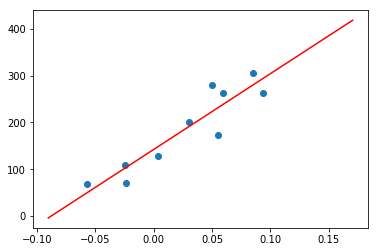

In [12]:
plt.scatter(x, y);
plot_line(w, b);

Next, we train the regressor on the entire dataset and fit a line.

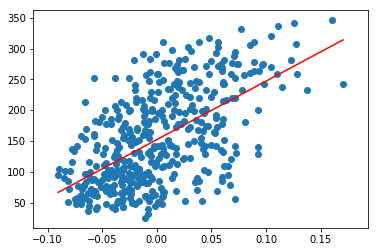

In [13]:
X = X.reshape(-1, 1)
lin_reg.fit(X, Y)
w = lin_reg.coef_[0]
b = lin_reg.intercept_
plt.scatter(X, Y);
plot_line(w, b);

The feature BMI does not seem to possess a linear relationship with the disease progression. The coefficient of determination (denoted by $R^2$) is a statistical measure of how close the data are to the fitted regression line and it can be calculated using `score()` method.

In [14]:
lin_reg.score(X, Y)

0.3439237602253803

So, the R-sqaured is around 34%, which is somewhat low.

#### Classification: 
- Predicting a label to classify the data points.
- Finding a decision boundary using a labeled training dataset to determine labels for unseen data.

An example of binary classification algorithm: Logistic regression - separates the classes using a linear boundary 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier </p>

Three classifiers A, B and C are trained on a given labeled dataset. The accuracy of the trained classifiers in predicting the labels correctly on the same dataset is as follows.

|Models | Accuracy| 
|---|---|
| Model A | 90%|
| Model B | 80%|
| Model C | 70%|

Clearly, model A is better at predicting labels for the training data than model B and C. Do you think model A will do a better job in predicting labels for yet unseen data as well?

To answer this question, let us first briefly overwiew the learning process for logistic classifiers.

It will be helpful to build our understanding of the learning process based on either the logistic classifier or the linear regression. When the neural networks are pared-down to a single layer with the commonly used logistic sigmoid function as the activation function, then what we get is a logistic classifier. These algorithms, that is logistic/linear regression and simple neural networks, are called parametric machine learning algorithms. In the context of parameteric algorithms, let us think about the following questions related to the learning process. 

#### What does the machine learn?

Answer: Model parameters (or weights) specific for each classification/regression algorithm.

#### How does the machine learn the parameters (or weights)?

Model parameters (or weights) are updated to keep on ***minimizing the cost function*** iteratively using the training data. The cost has distinctive mathematical formulations for various algorithms but the gist of the learning process is the same.


#### Cost function  
* For regression: Measures the difference between the predicted output and the true output in the ***training datset***. 
* For classification: Measures the error in classifying examples in the ***training dataset***. 

***When to stop the iterative learning process? Until the cost function has reached its minimum value?*** 

To answer the question, let us consider this binary classification problem with two variables (features). 
<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg" width="250" height="250" />

* Which of the two decision boundaries (black or green) will have a lower value for the cost function?
* Which decision boundary would you prefer for classifying the unseen examples?

Since the cost function is calculated solely based on the training dataset, minimizing it too much might mean that the model do not generalize well to unseen examples. This is called overfitting. 

***Over-fitting and under-fitting to the training set***  
The models can over-train on a dataset, that is they learn the dataset so well that they do not generalize well to the examples outside of that dataset. 

If we try to fit too complex of a curve as the decision boundary separating the classes and we don't have enough training examples to estimate the parameters for the curve, then we suffer from over-fitting.

On the other hand, if we try separating the classes with an over-simplified curve as the decision boundary and we have enough training examples to estimate a curve that would be a better fit, then we suffer from under-fitting. 

![](https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg)

How do we know whether our model is overfitting or underfitting to the training set?

Answer: At the beginning, we save some examples as the validation set and use it to test the performance of the model. 

|Models | Accuracy on the training set | Accuracy on the validation set | 
|---|---|---|
| Model A | 90%| 70% |
| Model B | 80%| 75% |
| Model C | 70%| 65% |

* With this additional information, can you guess which model will likely perform better for the unseen data?
* Which of these three models would you suspect for overfitting the training data?
* Which of these three models would you suspect for underfitting the training data?

The problem for over-fitting and under-fitting and the underlying reasons of model complexity is the same for regression as well.

![](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png)

Key take-aways so far:
- Always save some examples from the datasets for testing model performance.
- Pay attention to the model performance on the validation set rather than solely on the training set.
- Watch out for both under-fitting and over-fitting.



How to address overfitting?
- Reduce the number of features 
    - Discard some features
    - Dimensionality reduction techniques such PCA, LDA, etc.
- Simplify the model (by tuning hyperparameters)
- Early termination (reducing the number of iterations for training)
- Regularization, if applicable
- Add more training examples, if possible  
![](https://i.stack.imgur.com/rpqa6.jpg)
In a nutshell, to reduce overfitting, reduce complexity.
To reduce underfitting, enhance complexity.

The next notebook on regression algorithms is meant to be a gentle introduction overviewing the various regression algorithms to give you a roadmap to explore and learn more deeply in your own time. We will use [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) dataset from a Kaggle competition to learn the algorithms.

In the last exercise notebook, you will tackle the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/overview) dataset from another Kaggle competition. You will practise hyper-parameters tuning, an essential part of optimizing a model, that will deepen your understanding of the algorithms introduced above.

### Acknowledgement:

The credits for the images used in the above are as follows.
- Image 1: https://commons.wikimedia.org/wiki/File:Gaussian_kernel_regression.png
- Image 2: https://github.com/trekhleb/machine-learning-octave/tree/master/logistic-regression
- Image 3: https://commons.wikimedia.org/wiki/File:Overfitting.svg
- Image 4: https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg
- Image 5: https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html
- Image 6: https://i.stack.imgur.com/rpqa6.jpg